# 线性回归 编程实践练习

**说明** 

基于 Andrew Ng的机器学习课程编程作业制作， 使用他的作业pdf里的步骤， 尽量细化步骤并添加一些数学公式， 让人多理解算法及数学推导过程。 


** 使用说明 **

1. 尽量做到每一步有说明， 保留一个空代码块供编辑， 方便下载到本地或支持ipython notebook的网站上进行练习。
2. 有本人实现的代码方案， 但暂时隐藏。
3. 有心练习的话， 每次新建副本， 不看其他参考， 重新实现。

首先导入一些 python 的常用包， 相应教程请先自行网上搜索。 

建议您有一定的 numpy, matplotlib, sklearn 基础, 或者还有pandas。 python更是必要的基础知识

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 第一部分 一元线性回归

pdf 最开始是 Octave 热身， python 相关热身请自行学习。

先给出本部分的大纲

1. 读取文件里的数据， 进行绘图
2. 按模型要求， 准备数据
3. 梯度下降， 实现成本函数并测试， 实现梯度下降算法
4. 回归直线绘图， 模型应用做预测
5. 误差变化过程绘图。 3d 和 轮廓。
6. 与 sciki learn 比较。



## 可视化起步

在开始正式学习之前， 先读取数据,  并绘个图， 有一个直观的印象。

### 1.0 读取文件中的数据

本练习中， 文件读取不难， 要考虑后期使用的方便性。

练习： 用 pandas 读取 csv 文件 ex1data1.txt ， 并显示数据的前三行

提示： 用 pandas 的话， 注意别把第一行的数据当成列名了， 可以使用names=['population', 'profit']， 用 names = ['x', 'y'] 也可以。

其他方案没有考虑，请见谅。

In [32]:
# Todo 练习
# 使用 pandas 读取 ex1data1.txt 文件，存入一个DataFrame

data = pd.read_csv('ex1data1.txt',  names=['population', 'profit'])

m = len(data)

assert len(data) == 97, "97条数据"
assert len(data.columns) == 2, "2列"

# DataFrame 转化成 np.array
# 读取第一行数据
first_record = data.values[0]
np.testing.assert_array_equal(first_record, [  6.1101,  17.592 ])

### 1.1 数据可视化， 绘图

使用pyplot, 绘制散点图（scatter 或 plot), 带标题名和横竖坐标名， 最好再调整下范围， x轴上， 5左边太空旷了。

提示： 如果使用的是 pandas 读取到的 DataFrame，  data[列名] 得到的是 Series, 不能用， 还需要 data[列名].values 才是得到 ndarray.

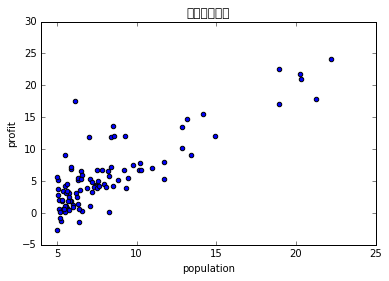

In [14]:
# 轮到你了， 请完成如下任务
# 1. 绘制数据的散点图
# 2. 坐标轴命名 
# 3. 图表命名（指定标题）

plt.scatter(data['population'].values, data['profit'].values)
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title(u"一元线性回归")

### 1.2 梯度下降

* 预备—— 一元线性回归 $h_\theta(x) = \theta_0 + \theta_1 x_1$

机器学习三要素——模型、 策略、 算法。  

本练习的**模型**为 一元线性 回归

定义变量：

1. 输入数据量大小为 m, 输入表示为 $ \mathbf{X} $, 输出表示为 $\mathbf{y} $
2. 待学习的权重向量维度为n，  此处 n = 1, 另有第0维,  表示为 $ \vec{\theta} = [ \theta_0, \theta_1] $， 则有假设函数为：

$$ h_\theta(x) = \sum\limits^{n}_{i=0} \theta_i x_i = \vec{\theta}^\mathrm{T} X $$

根据公式， 我们需要:

1. 输入变量 x(或X)，  $m  \times (n+1)$ 维,  第0维初始化为1
2. 输出变量 y
3. 权重向量变量  theta

方案一 使用pandas：

变量 x 为DataFrame, 有两个列， x0 和 x1,  其中， x0 列的值全部为 1

变量 theta 初始化为[0, 0] 的 ndarray

In [15]:
# Todo 练习
# 任务如下：
# 1. 变量 x ,  m x (n+1)维的np.array， 第0维（即第一列）初始化为1
# 2. 变量 y,  一维列向量 np.array
# 3. 权重向量变量 theta, 

x = pd.DataFrame()
x['x0'] = np.ones(len(data))
x['x1'] = data['population']

x = x.values
y = data['profit'].values
theta = np.zeros(2)

assert type(x) == np.ndarray and x.shape == (97, 2),         "x 是 m x (n+1)维的numpy.array 数组"
assert type(y) == np.ndarray and y.shape == (97, ),           "y 是 m x 1维的numpy.array 数组"
assert type(theta) == np.ndarray and theta.shape == (2, ), "theta 是 2 x 1维的numpy.array 数组"

* 选择策略 —— 误差函数成本函数 (cost function)

回归分析一般都使用均方根误差、 拟合标准差 (RMSE  Root mean squared error),  但此处 ng 使用的是均方差(MSE) 再除常数2。

$ J(\theta) = \frac{1}{2m} \sum\limits^{m}_{i=1}(h_\theta(x^i) - y^i)^2 = \frac{1}{2m} \Vert X\theta - y \Vert^2_2$

i 表示 第i条数据， 即第i行的值

请实现该函数：

In [16]:
# Todo 练习
# 实现 成本函数 compute_cost

def compute_cost(x, y, theta):
    x_ = np.dot(x, theta.T) - y
    return sum(x_ * x_) / (2 * len(x))

j_val = compute_cost(x, y, theta)
print j_val

assert abs(j_val - 32.0727338775) < 0.0001, "成本函数实现错误"

32.0727338775


* 计算初始的误差值

即 theta = [0 0]

In [17]:
# 验证 compute_cost ， 不需要你自己编写代码

j_val = compute_cost(x, y, theta)
print j_val

assert abs(j_val - 32.0727338775) < 0.0001

32.0727338775


* 梯度下降参数初始化

迭代次数及学习率$\alpha$

In [18]:
iterations = 1500
alpha = 0.01

* 运行梯度下降

$ \theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^i) - y^i)x^i_j$

$ \theta = \theta - \alpha\vec{\theta}^\mathrm{T} X $

请实现梯度下降法的函数——这部分的推导先推后。

In [20]:
# Todo 练习
# 实现 梯度下降 gradient_descent 函数

def gradient_descent(x, y, theta, alpha, iterations):
    theta_trace = [theta]

    m = len(x)
    for i in range(iterations):
        x_ = np.dot(x.T, np.dot(x, theta.T) - y) 
        
        theta = theta - alpha * x_ / m
        theta_trace.append(theta)
        #print compute_cost(x, y, ntheta)
    return theta, theta_trace

theta, theta_trace = gradient_descent(x, y, theta, alpha, iterations)
theta_array = np.array(theta_trace)
print 'Theta found by gradient descent: '
print "%f %f " % tuple(theta)

assert np.allclose(theta, [-3.630291, 1.166362]),  "结果不正确"

Theta found by gradient descent: 
-3.630291 1.166362 


* 根据模型绘图


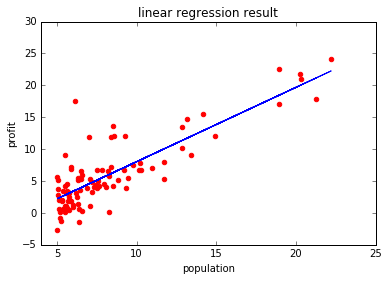

In [21]:
# Todo 练习

plt.scatter(data['population'].values, data['profit'].values, color = 'red')
plt.plot(data['population'].values, np.dot(x, theta), color='blue')
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title("linear regression result")

* 预测

预测人口 为35000 和 70000时的值

In [23]:
# Todo 练习

pred_x = np.array([[1, 3.5], [1, 7]])
pred_y = np.dot(pred_x, theta)

assert np.allclose(pred_y*10000, [ 4519.767868, 45342.450129])
print 'For population = 35,000, we predict a profit of %f\n'  % (pred_y[0] * 10000)
print 'For population = 70,000, we predict a profit of %f\n'  % (pred_y[1] * 10000)

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



* 对误差函数进行可视化分析

初始化 theta0 , theta1 两个变量， 使用 np.linspace

In [24]:
# Todo 练习

theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

初始化 J_vals 为一个 0 矩阵， $\theta_0 \times \theta_1$ 维

计算各点 对应的 误差值

In [25]:
# Todo 练习
# 计算 J_vals 误差矩阵

J_vals = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]])
        J_vals[i][j] = compute_cost(x, y, t)

minpos = J_vals.argmin() 
miny= minpos % len(theta0)
minx = minpos / len(theta0)
print J_vals.min(), '  at  ', theta0[minx], theta1[miny] 

4.48045939189   at   -3.73737373737 1.17171717172


* 3d绘图

提示： 

1. 3d 绘图可使用 mpl_toolkits.mplot3d.axes3d 
2. 函数是 plot_surface


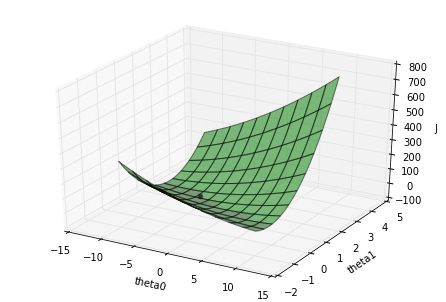

In [26]:
# Todo 练习
# 3d 绘图， 误差情况

import mpl_toolkits.mplot3d.axes3d as p3
xzim, yzim = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(theta[0], theta[1], compute_cost(x, y, theta), color='r')
ax.plot_surface(xzim, yzim, J_vals.T, color='g', alpha=.5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel(' J ')

* 轮廓绘图

**注** 因为 contour 的meshgrid 性质， J_vals 需要转置。 我也不知道——反正要转置


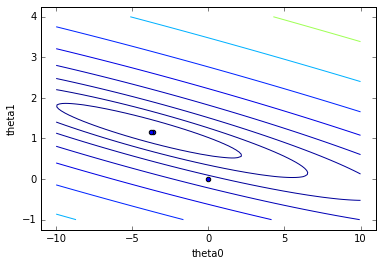

In [27]:
# Todo 练习
# 轮廓绘图， 误差情况
plt.figure()
plt.contour( theta0, theta1,  J_vals.T, np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.scatter(-3.630291, 1.166362 )
plt.scatter(0, 0)
plt.scatter(-3.737, 1.17171717172)

### 比较
与 sklearn 或 scipy 的现成结果比较

sklearn 得到的结果     为: 截距 -3.895781    斜率  1.193034 
你实现的梯度下降结果为: 截距 -3.630291    斜率  1.166362 


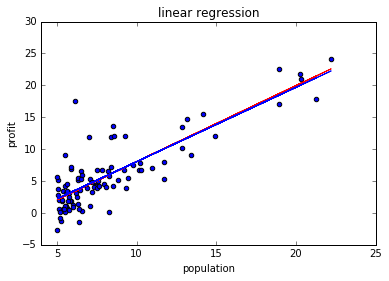

In [36]:
# Todo 练习
# 学习使用 sklearn的线性回归算法
# 1. 请百度或谷歌 找到线性回归在 sklearn 中叫什么， 导入包
from sklearn.linear_model import LinearRegression as lm

# 2. 准备数据
columns = data.columns[:-1]

# 3. 调用算法
model = lm()
model.fit(data[columns].values, data['profit'].values)

# 4. 查看参数结果
print "sklearn 得到的结果     为: 截距 %f    斜率  %f "  % (model.intercept_, model.coef_)
print "你实现的梯度下降结果为: 截距 %f    斜率  %f " % tuple(theta)

# 5. 预测
pred = model.predict(data[columns].values)

# 6. 绘图
plt.figure()
plt.scatter(data['population'].values, data['profit'].values)
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title(u"linear regression")

# 7. 对比你预测结果 与 sklearn结果的两条线
prd = model.predict(data[columns].values)
plt.plot(data['population'].values, prd, color='red')
plt.plot(data['population'].values, np.dot(x, theta) , color='blue')
plt.show()

## 第二部分 多元线性回归

* 数据读取， 读取文件 ex1data2.txt

In [38]:
# Todo 练习

data = pd.read_csv('ex1data2.txt',  names=['size', 'bedroom', 'price'])

X = data[data.columns[:-1]]
y = data['price']

assert len(data) == 47, "47条数据"
assert len(data.columns) == 3, "3列"

* 特征归一化 feature normalize, feature scale

有助于算法快速收敛，可以通过迭代算法的公式来解释

将特征的取值范围归到 0-1 或 -1-1之间。

0-1 转换： X_norm = (X - min) / (max - min)

-1 - 1 转换 :  X_norm = (X - mean) / std 或 (max - min)

In [39]:
# Todo 练习
def feature_normalize(X):
    mu = X.mean()
    sigma = X.std()
    X = (X - mu) / sigma
        
    return X, mu, sigma

对数据进行归一化处理

In [40]:
X, mu, sigma = feature_normalize(X)

准备好要线性回归需要的X, y

要给上面的特征值添加新的一列 $x_0$

In [ ]:
X['x0'] = np.ones(len(data))
print X.head(3)

* 梯度下降

如果一元线性回归的梯度下降函数利用了矩阵相乘的方法， 则可以直接用于多元线性回归， 默认可以使用

参数初始化

In [45]:
# 参数初始化
alpha = 0.01;
num_iters = 400;
theta = np.zeros(X.shape[1])
print X.shape[1]

2


计算 theta 权重向量

In [46]:
theta, theta_trace = gradient_descent(X, y, theta, alpha, num_iters)
print theta
assert np.allclose(theta, [ 100087.11600585, 3673.54845093]),  "结果不正确"

[ 100087.11600585    3673.54845093]


### 学习速率的选取

暂空缺

## 正规方程

闭合解(closed-form):

由方程:
$$ J(\theta) = \frac{1}{2m} \Vert X\theta - y \Vert^2_2 $$

去掉常系数 1/2m, 求导得：

$$ \frac{dJ}{d\theta}(\theta) =  \theta X^\mathrm{T}X - X^\mathrm{T} y$$

极值（最小值）出现于导数为0时——有前提， 令上式=0

求得 

$$ \theta = (X^\mathrm{T} X) ^{ -1} X^\mathrm{T} y $$

可知， $$ X^\mathrm{T} X $$ 必须为可逆矩阵

In [47]:
# Todo 练习
def normal_eqn(X, y):
    return np.dot( np.dot( np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [51]:
X = data[data.columns[:-1]]
X['x0'] = np.ones(len(data))
X = X[['x0', 'size', 'bedroom']]

y = data['price']

result =  normal_eqn(X.values, y.values)
print result
assert np.allclose(result, [ 89597.9095428, 139.21067402, -8738.01911233]),  "结果不正确"

[ 89597.9095428     139.21067402  -8738.01911233]


# 本练习到此为止， 谢谢

